# Demo
---

This notebook demonstrates how to use the `Spindles` package. As an example, we will analyze the lowest-dimensional counterexample to the (bounded) Hirsch conjecture known to date. It is a spindle with 40 facets in dimension 20 and is constructed from a 5-dimensional spindle found by Matschke, Santos, and Weibel (2015).

---
## Contents

---

## Loading Packages
To use the `Spindles` package in this repository, you need to install the following Julia packages (see here for instructions):
* `Polyhedra`
* `Graphs`
* `Plots`
* `Printf`
* `DelimitedFiles`

The `Spindles` package itself is not available via the Julia package manager. To make sure it is found by Julia, you may have to add the following code before loading the package.

In [1]:
if !(joinpath("..", "src") in LOAD_PATH)
    push!(LOAD_PATH, joinpath("..", "src"));
end

4-element Vector{String}:
 "@"
 "@v#.#"
 "@stdlib"
 "..\\src"

Now we can load the package. Since we will use `Plots` for visualization later, we may as well load it here too.

In [2]:
using Spindles
using Plots

## Building a Spindle
The `Spindles` package provides a data type called `Spindle`. Objects of this type are created from an inequality description $B \le d$. 

**Note:** `Spindles` currently only supports full-dimensional (bounded) spindles given by minimal descriptions.

Let's take a look at the 5-dimensional spindle first. Its coefficient matrix is provided in the text file `s-25-5.txt` (located in the same directory as this notebook). We read the matrix from the file as follows:

In [3]:
B = Spindles.readrational("s-25-5.txt", BigInt)

25×5 Matrix{Rational{BigInt}}:
  1//1       0//1       0//1       0//1       32//1
  1//1       0//1       0//1       0//1      -32//1
  1//1       0//1       0//1      21//1       -7//1
  1//1       0//1       0//1     -21//1       -7//1
  1//1       0//1       0//1      20//1       -4//1
  1//1       0//1       0//1     -20//1       -4//1
  1//1       0//1       0//1      16//1      -15//1
  1//1       0//1       0//1     -16//1      -15//1
  1//1       3//50     -1//25      0//1      -30//1
  1//1      -3//50     -1//25      0//1       30//1
  1//1       3//1000    7//1000    0//1     -159//5
  1//1      -3//1000    7//1000    0//1      159//5
 -1//1      60//1       0//1       0//1        0//1
 -1//1     -55//1       0//1       0//1        0//1
 -1//1       0//1      76//1       0//1        0//1
 -1//1       0//1     -33//1       0//1        0//1
 -1//1      44//1      34//1       0//1        0//1
 -1//1       8//1     -30//1       0//1        0//1
 -1//1     -34//1      36//1     

We will work in exact rational arithmetic throughout the example, so the matrix `B` returned by the above call to `readrational` is of type `Rational`. More precisely, the type is `Rational{BigInt}`, where `BigInt` is the type of the numerators and denominators. Note that this type is specified in the second argument of the `readrational` function. We chose `BigInt` (over the standard `Int`) here to avoid integer overflows. 

The right-hand side vector $d$ for our small spindle is just the all-ones vector, which we create as follows, using the same data type `Rational{BigInt}`:

In [4]:
d = ones(Rational{BigInt}, size(B, 1))

25-element Vector{Rational{BigInt}}:
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1
 1//1

Now we're ready to create a `Spindle` object from the input data.

In [5]:
s = Spindle(B, d);

In [32]:
eltype(B)

Rational{BigInt}

Even though we created `s` as an object of type `Spindle`, this doesn't automatically mean that `s` is a spindle. For this, there must exist two vertices (the *apices*) whose incident facets partition the set of all facets. The vertices of `s` can be retrieved as follows:

In [7]:
vertices(s)

244-element iterator of Vector{Rational{BigInt}}:
 Rational{BigInt}[-1//1, 0//1, 0//1, 0//1, 0//1]
 Rational{BigInt}[-425684661//429228619, -60000//429228619, -1711979//6867657904, -14996250//429228619, -26716040//429228619]
 Rational{BigInt}[-425684661//429228619, -60000//429228619, 751979//7726115142, -14996250//429228619, -26716040//429228619]
 Rational{BigInt}[-73523833117//73547953123, -364000//73547953123, -8040002//809027484353, -8042928250//73547953123, 4595993320//73547953123]
 Rational{BigInt}[-52479968667//52498134373, -244000//52498134373, -18165706//1732438434309, 3346994250//52498134373, 3280565720//52498134373]
 Rational{BigInt}[-10855753//10859383, -55//10859383, -110//10859383, -2377475//21718766, 678598//10859383]
 Rational{BigInt}[-3536323//3538237, -29//3538237, -58//3538237, 227750//3538237, 221080//3538237]
 Rational{BigInt}[-3823//3856, -1//7712, -1//3856, -3999//123392, -7679//123392]
 Rational{BigInt}[-279727//280277, 25//1121108, -50//840831, -122505//1121108,

If you are only interested in the number of vertices, you can also do:

In [8]:
nvertices(s)

244

To check whether `s` is a spindle, we call the function `apices` from the `Spindles` package, which tries to find the indices of two vertices that can take the role of the apices.

In [9]:
apices(s)

2-element Vector{Int64}:
  1
 64

Great! We have indeed constructed a spindle. We can retrieve the actual coordinates of the two apices as follows (note that `vertices(s)` returns an iterator, so we first need to wrap it in `collect(...)` before accessing specific indices):

In [10]:
collect(vertices(s))[apices(s)]

2-element Vector{Vector{Rational{BigInt}}}:
 [-1//1, 0//1, 0//1, 0//1, 0//1]
 [1//1, 0//1, 0//1, 0//1, 0//1]

The particular spindle `s` that we just modeled using the `Spindle` data type is known to have an interesting property: the shortest path in the graph of `s` that connects the two apices is of length 6, one more than the dimension 5. This fact was crucial to build from `s` a counterexample to the Hirsch conjecture. Let's verify this and compute the length of a shortest path between `apices(s)[1]` and `apices(s)[2]`:

In [33]:
 Spindles.dist_toapex(s, apices(s)...)

6

## Enumerating Faces
The `Spindles` package implements an algorithm to enumerate all faces of a given dimension. On larger inputs, the algorithm works best for near-simple spindles.

For example, to find all 2-dimensional faces (or *2-faces* for short) of `s`, we call

In [12]:
fs = facesofdim(s, 2)

length(pairs) = 569
(length(nondegenerate_pairs), length(degenerate_pairs)) = (569, 0)

569-element Vector{Vector{Int64}}:
 [21, 22, 25]
 [20, 21, 22]
 [20, 22, 25]
 [20, 21, 25]
 [19, 21, 22]
 [19, 22, 25]
 [19, 21, 25]
 [16, 23, 24]
 [16, 22, 24]
 [16, 22, 23]
 [22, 23, 24]
 [16, 21, 24]
 [16, 21, 23]
 ⋮
 [1, 5, 14]
 [5, 13, 23]
 [3, 5, 13]
 [1, 5, 13]
 [5, 16, 21]
 [5, 16, 20]
 [3, 5, 16]
 [1, 5, 16]
 [5, 15, 21]
 [3, 5, 15]
 [1, 5, 15]
 [5, 10, 20]

The result is a list of the incident facets for each 2-face. Let's have a closer look at one of the faces from the list and find all its vertices.

In [53]:
face = fs[44]
println(face)
collect(Spindles.incidentvertices(s, face))

[14, 20, 24]


7-element Vector{Int64}:
   1
  20
  21
 161
 162
 207
 208

Note here that, like the function `vertices`, `incidentvertices` returns an iterator over all vertices in the given face, so we have to `collect(...)` the result again to display it.

## Plotting 2-Faces

We can even plot the face (or rather a 2-dimensional projection of it):

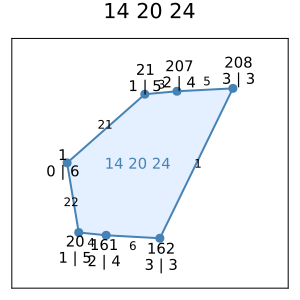

In [29]:
plot2face(s, face, usecoordinates=true)

Each vertex is labeled by at which index it appears in `vertices(s)`. Edges are labeled by the facet(s) that they are contained in, excluding the facets that define the 2-face.

If we are only interested in the graph of the face, we can also drop the optional argument `usecoordinates` (or set it to `false`) and add some more information to the vertex labels by passing the option `showdist=true` to the `plot2face` function:

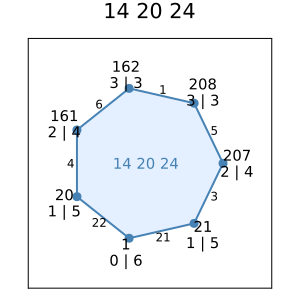

In [31]:
plot2face(s, face)  # showdist=true

Now each vertex in the figure is not only labeled by its index but (on the second line of the label) also by its respective distance to each of the two apices of `s`. For instance, `1 | 5` in the label of vertex `20` means that `20` is one edge step away from the first apex `apices(s)[1]` and five steps away from `apices(s)[2]`.
Likewise, the label `0 | 6` for vertex `1` means that `1` is at distance 0 from `apices(s)[1]`. This shouldn't be surprising because `1` *is* the first apex.
Note here that for each vertex, the sum of both distances must be at least 6 because we know that there is no shorter path between the apices.


## Finding Good 2-Faces
The original motivation for developing the `Spindles` package was the search for 2-faces with a special property. For example, let's take a look at the 2-face defined by `[14, 20, 24]` again. This time, let's increase the size of the plot pane and add another option (explained below).

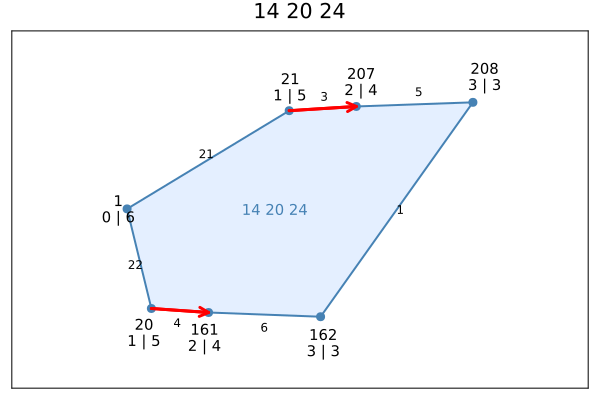

In [54]:
plot2face(s, face, usecoordinates=true, figsize=(600,400), edgepair=([21,207],[20,161]))

What the above call to `plot2face` produces is a plot with two special edges marked up in red. Suppose we start at the vertex `1` (an apex) and walk in either of the red directions through the interior of the face until we hit an edge. The geometry of the face tells us that the edge that we land on must have one of the vertices `208` or `162` as an endpoint. From either of those, there is a path of length 3 to the other apex (the one that's not contained in the face). 

Here is another example:

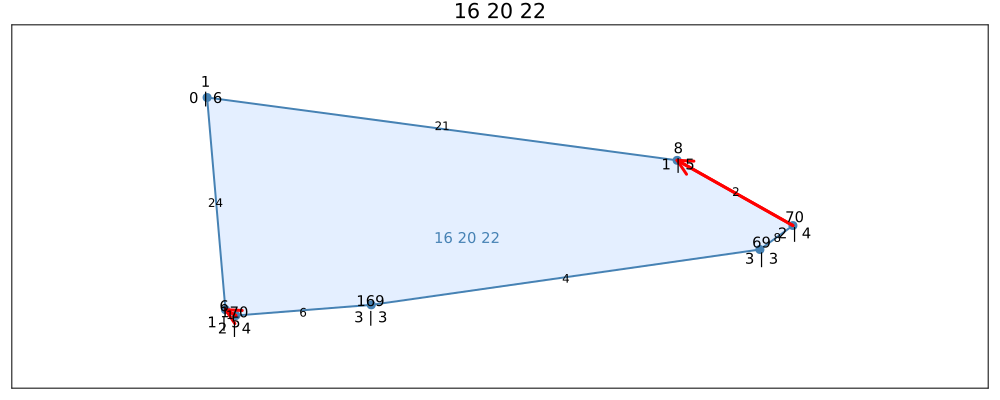

In [55]:
plot2face(s, fs[16], usecoordinates=true, figsize=(1000,400), edgepair=([8,70], [6,170]))

This time, the red arrows indicate that we may start at any of the vertices `69` or `169` (those labeled `3 | 3`) and, by following either of the two red directions, land on an edge that contains the apex `1`.

What does this 2-face and the one above have in common? They both have two edges (the ones marked up in red) that partition all vertices - except the endpoints of these edges - into two "shores". These "shores" have the following property: one of them is close to one apex, and the other one is close to the other one. Here, "close" means that if we pick two arbitrary vertices, one from each shore, then the total number of steps to the respectively closest apex is at most 3. Note that 3 equals the dimension of `s` minus 2.

Let's call a 2-face with this property a *good* 2-face. The good 2-faces of `s` and similar spindles is what the authors of this notebook originally were after. So the `Spindles` package provides a function that tests a 2-face for being good and, if yes, returns two edges and the corresponding vertex "shores" that certify this property.

In [45]:
isgood2face(s, face)

Spindles.FaceState(true, [14, 20, 24], ([161, 20], [21, 207]), ([1], [208, 162]))

The information returned by the function is wrapped in a type called `FaceState`. You may call
```julia
    fieldnames(Spindles.FaceState)
```
to inspect all attributes. To only retrieve the value of the attribute that indicates whether the given face is good, do the following:

In [52]:
isgood2face(s, face).good

true

The following code finds all good 2-faces of `s`, using the list of 2-faces `fs` that we built above.

In [51]:
goodfaces = []
for f in fs
    fstate = isgood2face(s, f)
    if fstate.good
        push!(goodfaces, fstate)
    end
end

println("Found $(length(goodfaces)) good 2-faces ($(length(fs)) in total).")

Found 32 good 2-faces (569 in total).


Finally, let's plot the graph of each good 2-face:

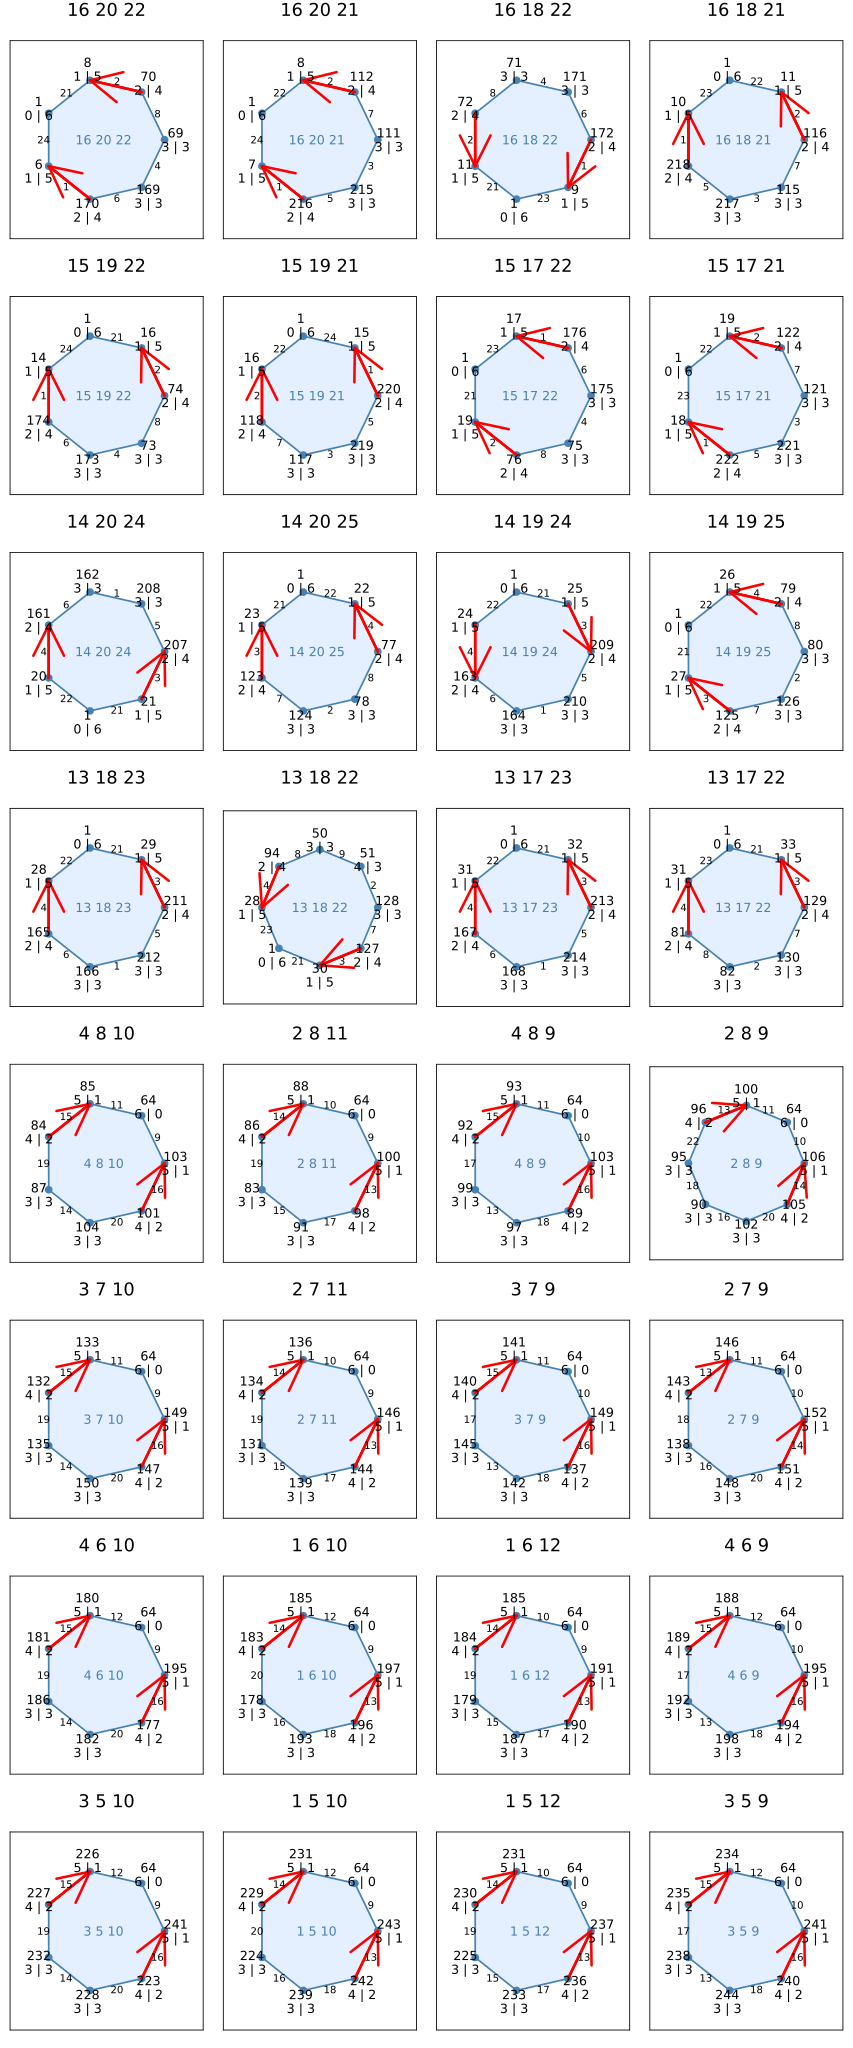

In [20]:
plot_arr = []
for fstate in goodfaces
    push!(plot_arr, plot2face(s, fstate.facets, edgepair=fstate.edges, usecoordinates=false))
end

ncols = 4
nrows = ceil(Int, length(plot_arr) / ncols)
plot(plot_arr..., layout=(nrows,ncols), size=(1000,nrows*300))

## High-dimensional

change the backend in `Polyhedra`, see [here](https://github.com/JuliaPolyhedra) for a list of available libraries,
e.g. [LRSLib](https://github.com/JuliaPolyhedra/LRSLib.jl) or [CDDLib](https://github.com/JuliaPolyhedra/CDDLib.jl).

```julia
    using LRSLib
    s = Spindle(B, d, LRSLib.Library());
```

Note that when using `CDDLib`, make sure to use the `:exact` flag to tell the library to use rational arithmetic:
```julia
    using CDDLib
    s = Spindle(B, d, CDDLib.Library(:exact));
```